# DatasetとDataLoder

## Dataset

In [56]:
import torchvision
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True)

In [3]:
# データを確認してみる
import sys
sys.getsizeof(train_dataset)

48

In [4]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [5]:
image, label = train_dataset[0]

In [6]:
image

In [7]:
label

5

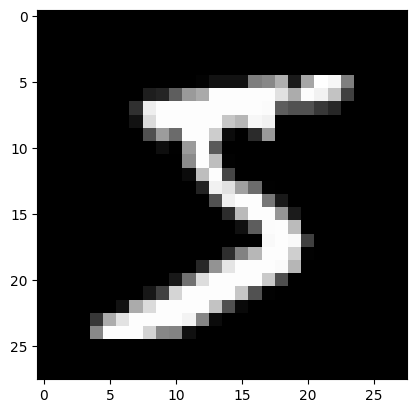

In [8]:
plt.imshow(image, cmap='gray')

In [9]:
# データ数を確認する
len(train_dataset)

60000

## Transform

In [13]:
# ToTensor()
# ()(image)はインスタンスをつくって、そのインスタンスでimageをテンソル変換する
# 0 ~ 1
image_tensor = torchvision.transforms.ToTensor()(image)

In [14]:
type(image_tensor)

torch.Tensor

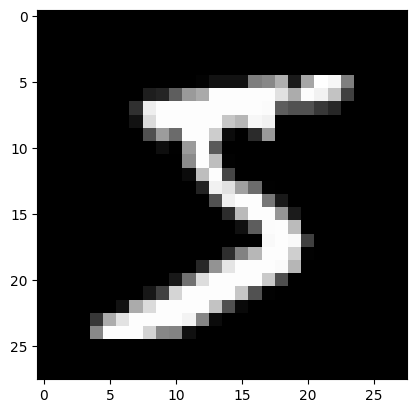

In [19]:
plt.imshow(image_tensor[0], cmap='gray')

In [24]:
# .Normailze()
# タプル形式で渡す
normalize_tensor = torchvision.transforms.Normalize((0.5,), (0.5, ))(image_tensor)
normalize_tensor 

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [26]:
# -1 ~ 1
print(normalize_tensor.min(), normalize_tensor.max())

tensor(-1.) tensor(1.)


In [31]:
# .Compose()
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

transformed_image = transform(image)

In [29]:
image

In [34]:
transformed_image.shape

torch.Size([1, 28, 28])

In [38]:
# データをとってくる時に、transformしてくれる
train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.MNIST('./mnist_data', train=False, download=True, transform=transform)

In [40]:
image, label = train_dataset[0]
image

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

## DataLoader

In [45]:
# データをとってくる時に、transformしてくれる
train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.MNIST('./mnist_data', train=False, download=True, transform=transform)

In [46]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=10,num_workers=2)

In [52]:
images, labels = next(iter(train_loader))
print(images.shape)

# (バッチサイズ、チャネル数, たて、よこ)

torch.Size([10, 1, 28, 28])


In [53]:
grid_images = torchvision.utils.make_grid(images)

In [54]:
grid_images.shape

torch.Size([3, 62, 242])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


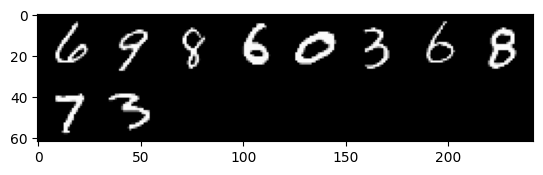

In [57]:
plt.imshow(torch.permute(grid_images,( 1, 2, 0)))

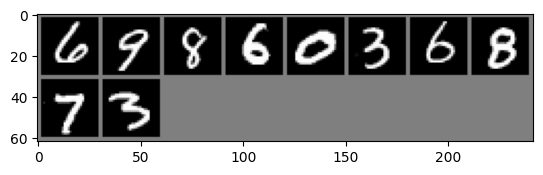

In [61]:
# 正規化を戻した方がより正確な画像になる
grid_images = grid_images / 2 + 0.5
plt.imshow(torch.permute(grid_images, (1, 2, 0)))

In [62]:
labels

tensor([6, 9, 8, 6, 0, 3, 6, 8, 7, 3])